In [83]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
from numpy import pi
import matplotlib.pyplot as plt


m = 12  # Number of control qubits
theta = 0.3647853

control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
qc.x(target_register)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2 * pi * theta, qubit, target_register)
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFT(m, inverse=True),
    inplace=True
)

# Measure everything
qc.measure(range(m), range(m))
#display(qc.draw(output='mpl'))

In [40]:
result = Sampler().run(qc).result()

In [41]:
most_probable = max(result.quasi_dists[0], key=result.quasi_dists[0].get)

print(f"Most probable output: {most_probable}")
print(f"Estimated theta: {most_probable/2**m}")
print(f"Actual theta: {theta}")
print("Percentage error: {0:.3f}".format((theta - most_probable/2**m)*100/theta))

Most probable output: 374
Estimated theta: 0.365234375
Actual theta: 0.3647853
Percentage error: -0.123


None

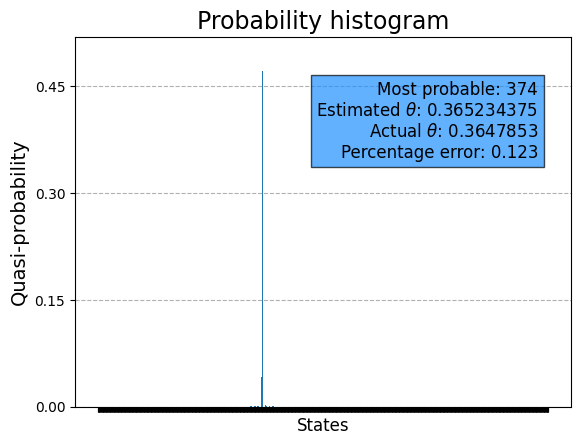

In [70]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Probability histogram", fontsize=17)
ax.set_xlabel('States', fontsize=12)
ax.set_ylabel("Quasi-probability", fontsize=12)
plt.xticks(visible=False)
ax.text(x=int(1e3),y=0.35, horizontalalignment='right', s=("Most probable: {}".format(most_probable) + "\n" + r"Estimated $\theta$: {}".format(most_probable/2**m) + "\n" + r"Actual $\theta$: {}".format(theta) + "\n" + "Percentage error: {0:.3f}".format((abs(theta - most_probable/2**m))*100/theta)),bbox=dict(facecolor='dodgerblue',alpha=0.7), fontsize=12)
figure = plot_histogram(result.quasi_dists, bar_labels=False, ax=ax)
#ax.set_ylim(0,0.5)
display(figure)

In [84]:
# Define a local backend
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit import transpile

backend = GenericBackendV2(num_qubits=18)

transpiled_circuit = transpile(qc, backend)
 
# Run the transpiled circuit using the simulated backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()


In [85]:
max_count = int(counts.most_frequent(), 2)
print(f"Most probable output: {max_count}")
print(f"Estimated theta: {max_count/2**m}")
print(f"Actual theta: {theta}")
print("Percentage error: {0:.3f}".format((theta - max_count/2**m)*100/theta))

Most probable output: 1489
Estimated theta: 0.363525390625
Actual theta: 0.3647853
Percentage error: 0.345


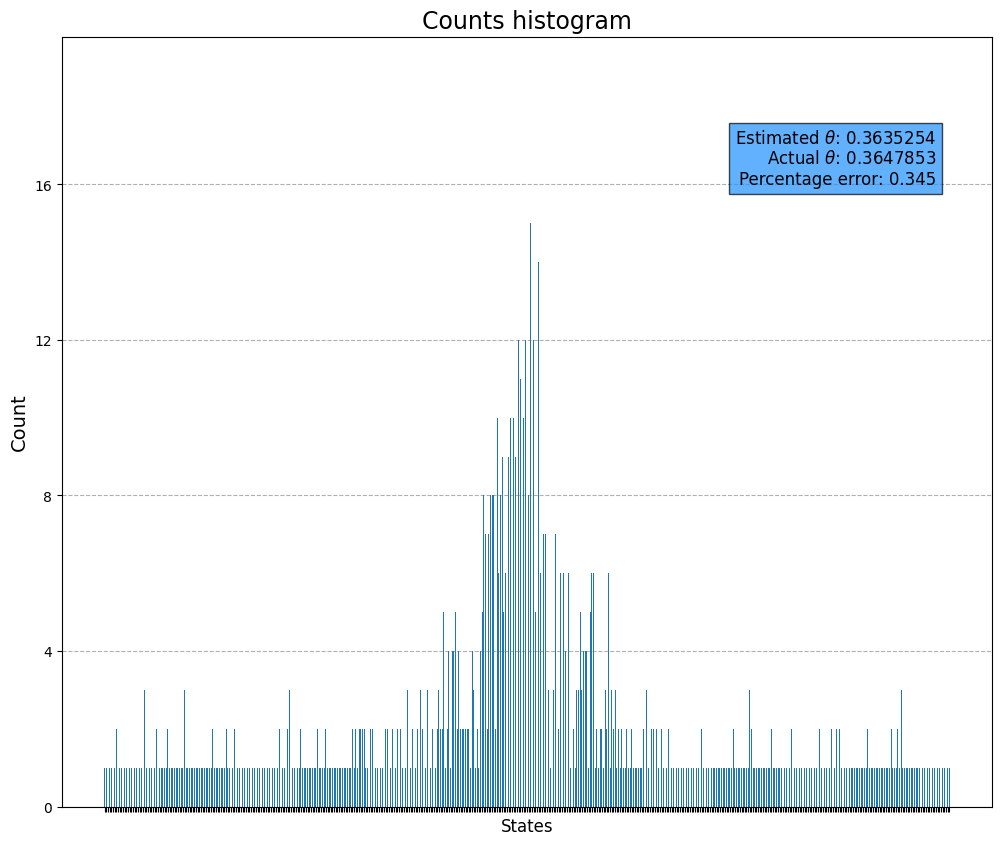

In [91]:

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.set_title("Counts histogram", fontsize=17)
ax.set_xlabel('States', fontsize=12)
ax.set_ylabel("Counts", fontsize=12)
plt.xticks(visible=False)
ax.text(x=500,y=16, horizontalalignment='right', s=(r"Estimated $\theta$: {0:.7f}".format(max_count/2**m) + "\n" + r"Actual $\theta$: {}".format(theta) + "\n" + "Percentage error: {0:.3f}".format((abs(theta - max_count/2**m))*100/theta)),bbox=dict(facecolor='dodgerblue',alpha=0.7), fontsize=12)

plot_histogram(counts, bar_labels=False, ax=ax)